## Import data

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import sys
import time
import scipy.stats
import os.path
from importlib import reload

# Set file paths and names
file_path = 'C:/Users/jlaru/OneDrive - Chapman University/Research/X-Ray Femtochemistry/Fermi 2017/Binned/BT2/'
file_name = 'XAS_014_020_bin.h5'

# Check that data file exists
if not os.path.exists(file_path+file_name) :
    raise NameError('File does not exist. Check file path and/or name.')

###################
### Import Data ###
###################
Success = True
fh5 = h5py.File(file_path+file_name, 'r')
# XAS matrix
if '/BinnedData/XAS_2dmatrix' in fh5 :
    Success = True
    xasmatrix = fh5['/BinnedData/XAS_2dmatrix'].value
else :
    print('XAS data matrix missing')
    Success = False
# FEL energy
if '/BinnedData/E_bin_centers' in fh5 :
    Success = True
    felenergy = fh5['/BinnedData/E_bin_centers'].value
else :
    print('FEL energy data missing')
    Success = False
# Delay
if '/BinnedData/delays_fs' in fh5 :
    Success = True
    delay = fh5['/BinnedData/delays_fs'].value
else :
    print('Delay data missing')
    Success = False
fh5.close()

if not Success :
    raise ImportError('Data analysis cancelled due to missing data')

## Plot data

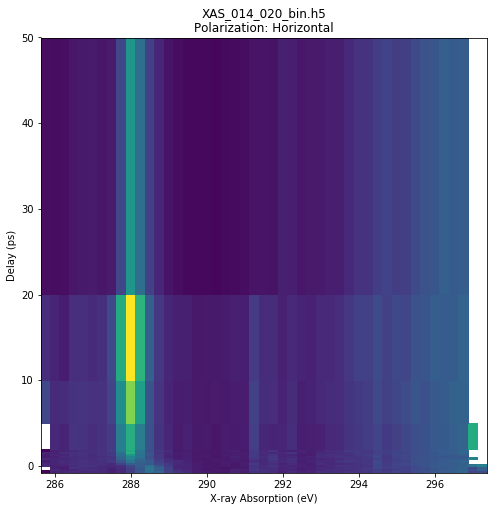

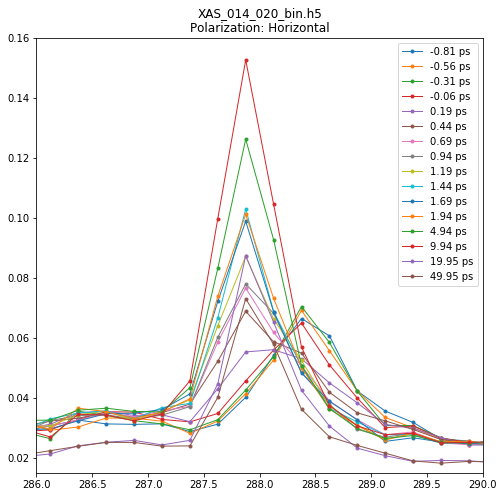

In [13]:
text_title = file_name+'\nPolarization: Horizontal'

plt.figure(figsize = [8,8])
plt.pcolor(felenergy, delay*1e-3, xasmatrix)
plt.xlabel('X-ray Absorption (eV)')
plt.ylabel('Delay (ps)')
plt.ylim([np.min(delay*1e-3), np.max(delay*1e-3)])
plt.title(text_title)

plt.figure(figsize = [8,8])
plt.ylim([0.015, 0.16])
i = 0
while i < len(xasmatrix) :
    plt.plot(felenergy,xasmatrix[i],'-o', ms=3, lw=1,label=(str(round(delay[i]*1e-3,2))+' ps'))
    i+= 1
plt.legend()
plt.xlim([286, 290])
plt.title(text_title)

print('')

Plot intensity versus delay


Note: Runs 18-20 extend past 10 ps and have a lower intensity than Run 14. The large drop in intensity after 10 ps is artifical.


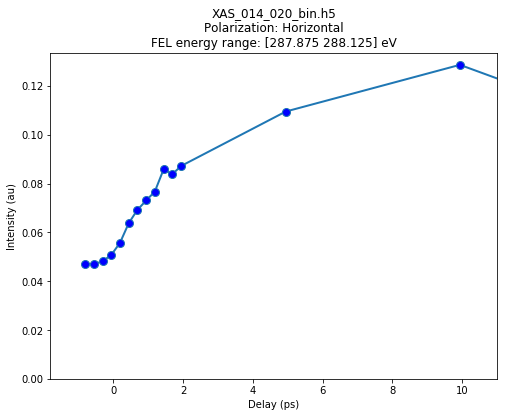

In [14]:
Xmin=287.7
Xmax=288.2
i = 0
Index = list()
while i < len(felenergy) :
    if felenergy[i] >= Xmin and felenergy[i] <= Xmax :
        Index.append(i)
    i+= 1
Intensity = list()
i = 0
while i < len(xasmatrix) :
    Intensity.append(sum(xasmatrix[i][Index])/len(Index))
    i+= 1

plt.figure(figsize = [8,6])
plt.plot(delay*1e-3, Intensity,'-o', ms=8, lw=2, mfc='blue')
plt.xlabel('Delay (ps)')
plt.ylabel('Intensity (au)')
plt.xlim([np.min(delay*1e-3)-1, 11])
plt.ylim([0, np.max(Intensity)+0.005])
plt.title(text_title+'\nFEL energy range: '+str(felenergy[Index])+' eV')

print('')
print('Note: Runs 18-20 extend past 10 ps and have a lower intensity than Run 14. The large drop in intensity after 10 ps is artifical.')